# Training logs for min move strategy

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
os.chdir('logs')

## LR Range Test

{'t_tuple': (20, 100), 'v_tuple': (0, 20), 'steps': 500, 'lr_tuple': (0.01, 2.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 1e-06, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


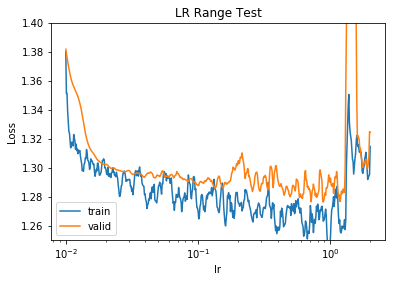

In [6]:
logs0 = np.load('20190808/range_test_b1024_d1e-06.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
epochs = logs0['lr']
t_loss0[2:-2] = np.convolve(t_loss0, np.ones(5)/5, 'valid')
v_loss0[2:-2] = np.convolve(v_loss0, np.ones(5)/5, 'valid')
plt.semilogx(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train','valid'])
plt.title('LR Range Test')
plt.xlabel('lr')
plt.ylabel('Loss')
plt.ylim([1.25, 1.4])
plt.show()

{'t_tuple': (20, 100), 'v_tuple': (0, 20), 'steps': 500, 'lr_tuple': (0.01, 2.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 1e-06, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}
{'t_tuple': (20, 100), 'v_tuple': (0, 20), 'steps': 500, 'lr_tuple': (0.01, 2.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


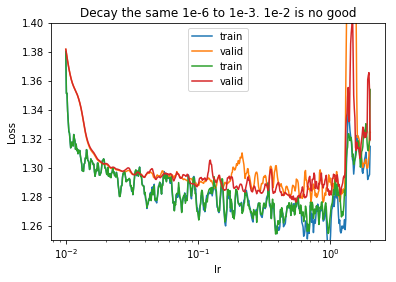

In [17]:
logs0 = np.load('20190808/range_test_b1024_d1e-06.npz')
logs1 = np.load('20190808/range_test_b1024_d0.001.npz')
print(logs0['params'])
print(logs1['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
t_loss1 = logs1['t_loss']
v_loss1 = logs1['v_loss']
epochs = logs0['lr']
t_loss0[2:-2] = np.convolve(t_loss0, np.ones(5)/5, 'valid')
v_loss0[2:-2] = np.convolve(v_loss0, np.ones(5)/5, 'valid')logs0 = np.load('20190808/range_test_b1024_d1e-06.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
epochs = logs0['lr']
t_loss0[2:-2] = np.convolve(t_loss0, np.ones(5)/5, 'valid')
v_loss0[2:-2] = np.convolve(v_loss0, np.ones(5)/5, 'valid')
plt.semilogx(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train','valid'])
plt.title('LR Range Test')
plt.xlabel('lr')
plt.ylabel('Loss')
plt.ylim([1.25, 1.4])
plt.show()
t_loss1[2:-2] = np.convolve(t_loss1, np.ones(5)/5, 'valid')
v_loss1[2:-2] = np.convolve(v_loss1, np.ones(5)/5, 'valid')
plt.semilogx(epochs, t_loss0, epochs, v_loss0, epochs, t_loss1, epochs, v_loss1)
plt.legend(['train','valid', 'train', 'valid'])
plt.title('Decay the same 1e-6 to 1e-3. 1e-2 is no good')
plt.xlabel('lr')
plt.ylabel('Loss')
plt.ylim([1.25, 1.4])
plt.show()

{'t_tuple': (20, 100), 'v_tuple': (0, 20), 'steps': 500, 'lr_tuple': (0.01, 2.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 1e-06, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}
{'t_tuple': (20, 100), 'v_tuple': (0, 20), 'steps': 500, 'lr_tuple': (0.01, 2.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 2048, 'decay': 1e-06, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


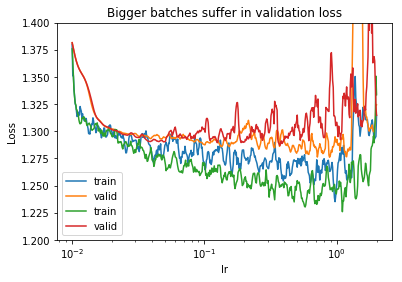

In [19]:
logs0 = np.load('20190808/range_test_b1024_d1e-06.npz')
logs1 = np.load('20190808/range_test_b2048_d1e-06.npz')
print(logs0['params'])
print(logs1['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
t_loss1 = logs1['t_loss']
v_loss1 = logs1['v_loss']
epochs = logs0['lr']
t_loss0[2:-2] = np.convolve(t_loss0, np.ones(5)/5, 'valid')
v_loss0[2:-2] = np.convolve(v_loss0, np.ones(5)/5, 'valid')
t_loss1[2:-2] = np.convolve(t_loss1, np.ones(5)/5, 'valid')
v_loss1[2:-2] = np.convolve(v_loss1, np.ones(5)/5, 'valid')
plt.semilogx(epochs, t_loss0, epochs, v_loss0, epochs, t_loss1, epochs, v_loss1)
plt.legend(['train','valid', 'train', 'valid'])
plt.title('Bigger batches suffer in validation loss')
plt.xlabel('lr')
plt.ylabel('Loss')
plt.ylim([1.2, 1.4])
plt.show()

Model can handle learning rates up to 1.0
Try overfitting on the training set. Since there are multiple "good" moves most of the time (only a minority of boards where only one move is good and all others are bad), perhaps using a validation set is not the right thing.
Rather, just overfit on the training set, and test using the eval_nn method.

{'t_tuple': (0, 100), 'v_tuple': None, 'epochs': 100, 'lr_tuple': (0.01, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 1e-06, 'save_period': 50, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


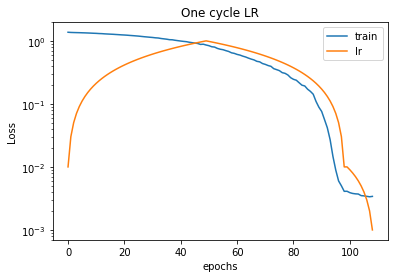

Super convergence as the lr goes back down


In [54]:
logs0 = np.load('20190808/0_100_epox100_clr1.0.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
lr0 = logs0['lr']
epochs = np.arange(len(t_loss0))
plt.semilogy(epochs, t_loss0, epochs, lr0)
plt.legend(['train','lr'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('Super convergence as the lr goes back down')

{'t_tuple': (0, 100), 'v_tuple': None, 'epochs': 100, 'lr_tuple': (0.01, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 1e-06, 'save_period': 50, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


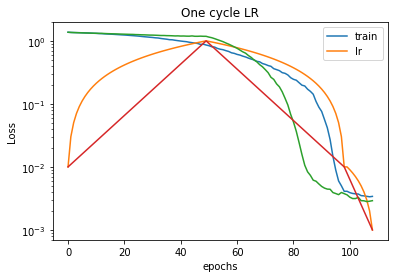

Exp cyc lr is slightly better


In [56]:
logs0 = np.load('20190808/0_100_epox100_clr1.0.npz')
logs1 = np.load('20190808/0_100_epox100_clrexp1.0.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
t_loss1 = logs1['t_loss']
lr0 = logs0['lr']
lr1 = logs1['lr']
epochs = np.arange(len(t_loss0))
plt.semilogy(epochs, t_loss0, epochs, lr0, epochs, t_loss1, epochs, lr1)
plt.legend(['train','lr'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('Exp cyc lr is slightly better')

Most rapid drop is around lr 0.04. Is too low lr endpoint slowing down learning?

{'t_tuple': (0, 100), 'v_tuple': None, 'epochs': 100, 'lr_tuple': (0.01, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 1e-06, 'save_period': 50, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


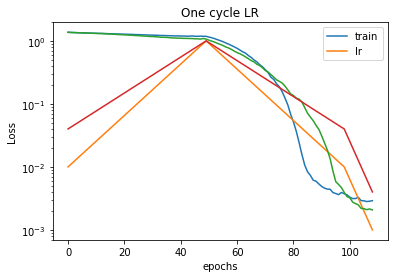

Higher lr endpoint better, but perhaps this is overfitting...


In [59]:
logs0 = np.load('20190808/0_100_epox100_clrexp1.0.npz')
logs1 = np.load('20190808/0_100_epox100_clrexp0.4_1.0.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
t_loss1 = logs1['t_loss']
lr0 = logs0['lr']
lr1 = logs1['lr']
epochs = np.arange(len(t_loss0))
plt.semilogy(epochs, t_loss0, epochs, lr0, epochs, t_loss1, epochs, lr1)
plt.legend(['train','lr'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('Higher lr endpoint better, but perhaps this is overfitting...')

{'t_tuple': (20, 100), 'v_tuple': (0, 20), 'epochs': 20, 'lr_tuple': (0.1, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


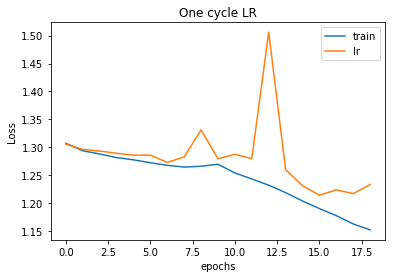

In [6]:
logs0 = np.load('20190809/20_100_epox20_clr1.0.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss'][:20]
v_loss0 = logs0['v_loss'][:20]
lr0 = logs0['lr']
epochs = np.arange(len(t_loss0))
plt.plot(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train','lr'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

Number of epochs is still a hyperparameter not determined by 1cycle policy. Too many epochs allows model to overfit, so I had to limit it to 20. The final lr drop at the end is not helping. The model only overfits, and val does not get better.

Non-overfitted model is stronger than Fixed play, whereas overfitted model is much weaker. Validation loss could in theory be a proxy for playing strength.

#### Use ax to optimize: 
Ax optimized hyperparameters for best model performance: stronger decay (2e-3), higher lr (start at 0.06), epox 70.

{'t_tuple': (20, 100), 'v_tuple': (0, 20), 'epochs': 69, 'lr_tuple': (0.06, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.0017, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


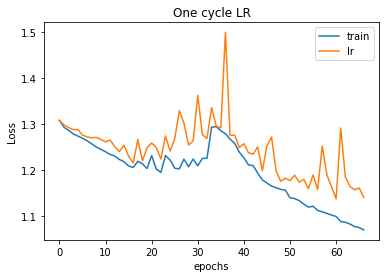

Ax parameters give lower val loss than my selection (1.15 vs 1.25)
This model has better min-dead score but weaker overall strength vs my model.


In [8]:
logs0 = np.load('20190809/20_100_epox69_clr1.0.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
lr0 = logs0['lr']
epochs = np.arange(len(t_loss0))
plt.plot(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train','lr'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('Ax parameters give lower val loss than my selection (1.15 vs 1.25)')
print('This model has better min-dead score but weaker overall strength vs my model.')

## 100-200 games
Generated next 100 games using Ax optimized model (`20190809/0_100_epox69_clr1.0.npz`). This model wasn't super strong, so selfplay games had similar mean score to Fixed order. However, move preference is different (more down moves than fixed order).

{'t_tuple': (100, 200), 'v_tuple': (0, 100), 'epochs': 54, 'lr_tuple': (0.05, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.002, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


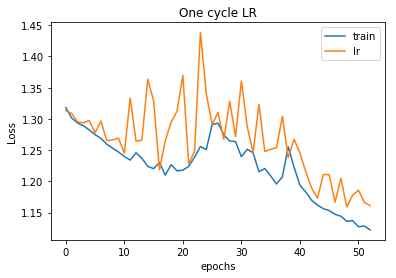

Model trained only on 100-200 also generalizes to 0-100 games


In [3]:
logs0 = np.load('20190809/100_200_epox54_clr0.05.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
lr0 = logs0['lr']
epochs = np.arange(len(t_loss0))
plt.plot(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train','lr'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('Model trained only on 100-200 also generalizes to 0-100 games')

{'t_tuple': (20, 100), 'v_tuple': (0, 20), 'epochs': 69, 'lr_tuple': (0.06, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.0017, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


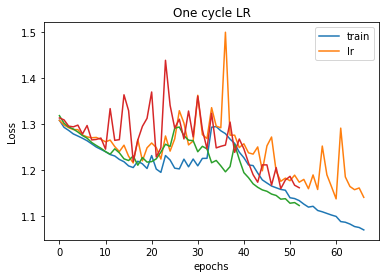

Model trained only on 100-200 also generalizes to 0-100 games


In [6]:
logs0 = np.load('20190809/20_100_epox69_clr1.0.npz')
logs1 = np.load('20190809/100_200_epox54_clr0.05.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
t_loss1 = logs1['t_loss']
v_loss1 = logs1['v_loss']
lr0 = logs0['lr']
epochs0 = np.arange(len(t_loss0))
epochs1 = np.arange(len(t_loss1))
plt.plot(epochs0, t_loss0, epochs0, v_loss0, epochs1, t_loss1, epochs1, v_loss1)
plt.legend(['train','lr'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('Model trained only on 100-200 also generalizes to 0-100 games')

{'t_tuple': (20, 200), 'v_tuple': (0, 20), 'epochs': 64, 'lr_tuple': (0.003, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.0008, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


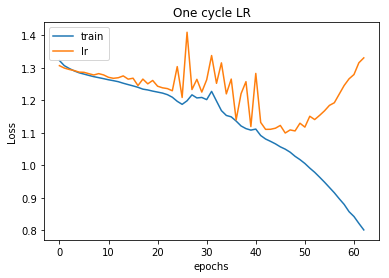

Overfitting


In [10]:
logs0 = np.load('20190809/20_200_epox64_clr0.003.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
lr0 = logs0['lr']
epochs = np.arange(len(t_loss0))
plt.plot(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train','lr'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('Overfitting')

## 200-300 games

{'t_tuple': (100, 300), 'v_tuple': (0, 100), 'epochs': 42, 'lr_tuple': (0.0072, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.0013, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


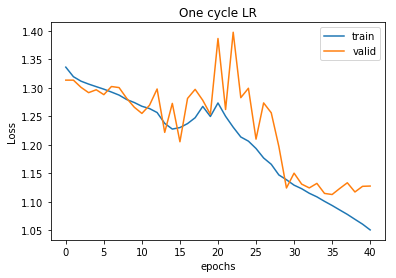

Trained on NN games still generalizes well to Fixed games


In [13]:
logs0 = np.load('20190811/100_300_epox42_clr0.0072.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
lr0 = logs0['lr']
epochs = np.arange(len(t_loss0))
plt.plot(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train','valid'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('Trained on NN games still generalizes well to Fixed games')

{'t_tuple': (20, 300), 'v_tuple': (0, 20), 'epochs': 38, 'lr_tuple': (0.009, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.000125, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


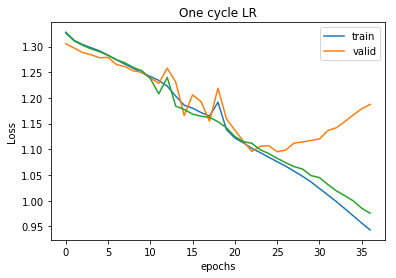

Training on all data appears to overfit the initial 20 games, although network may be stronger


In [12]:
logs0 = np.load('20190811/20_300_epox38_clr0.009.npz')
logs1 = np.load('20190811/0_300_epox38_clr0.009.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
t_loss1 = logs1['t_loss']
lr0 = logs0['lr']
epochs = np.arange(len(t_loss0))
plt.plot(epochs, t_loss0, epochs, v_loss0, epochs, t_loss1)
plt.legend(['train','valid'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('Training on all data appears to overfit the initial 20 games, although network may be stronger')

## 400 games

{'t_tuple': (100, 400), 'v_tuple': (0, 100), 'epochs': 36, 'lr_tuple': (0.01, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.0016, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


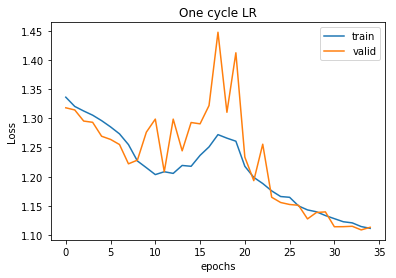

NN games generalize well to Fixed games, max lr of 1.0 may be a bit high


In [11]:
logs0 = np.load('20190812/100_400_epox36_clr0.01.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
lr0 = logs0['lr']
epochs = np.arange(len(t_loss0))
plt.plot(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train','valid'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('NN games generalize well to Fixed games, max lr of 1.0 may be a bit high')

{'t_tuple': (20, 400), 'v_tuple': (0, 20), 'epochs': 22, 'lr_tuple': (0.038, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.00052, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


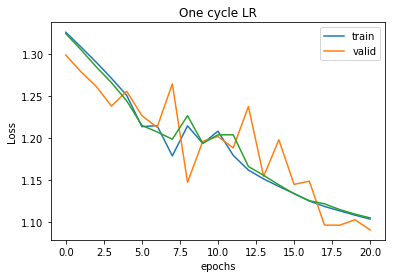

No longer overfitting the initial 20 games. Good generalizing ability.


In [10]:
logs0 = np.load('20190812/20_400_epox22_clr0.038.npz')
logs1 = np.load('20190812/0_400_epox22_clr0.038.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
t_loss1 = logs1['t_loss']
lr0 = logs0['lr']
epochs = np.arange(len(t_loss0))
plt.plot(epochs, t_loss0, epochs, v_loss0, epochs, t_loss1)
plt.legend(['train','valid'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()More
print('No longer overfitting the initial 20 games. Good generalizing ability.')

## 500 games: More range tests
Validation loss likely scales with model performance.

{'t_tuple': (100, 500), 'v_tuple': (0, 100), 'epochs': 20, 'lr_tuple': (0.01, 0.5), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


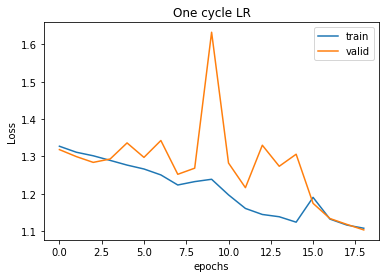

100-500 games still generalizes to 0-100 games. Max lr 0.5 is still a bit high.


In [23]:
logs0 = np.load('20190813/100_500_epox20_clr0.01.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
lr0 = logs0['lr']
epochs = np.arange(len(t_loss0))
plt.plot(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train','valid'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('100-500 games still generalizes to 0-100 games. Max lr 0.5 is still a bit high.')

{'t_tuple': (200, 500), 'v_tuple': (0, 100), 'epochs': 20, 'lr_tuple': (0.005, 0.2), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


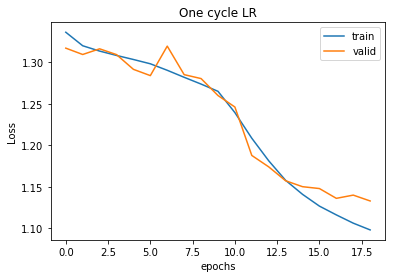

Even 200-500 games still generalizes to 0-100 games.


In [30]:
logs0 = np.load('20190813/200_500_epox20_clr0.005.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
lr0 = logs0['lr']
epochs = np.arange(len(t_loss0))
plt.plot(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train','valid'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('Even 200-500 games still generalizes to 0-100 games.')

OK to proceed with adding 0-100 games into the training.

{'t_tuple': (20, 500), 'v_tuple': (0, 20), 'steps': 1000, 'lr_tuple': (0.001, 2.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


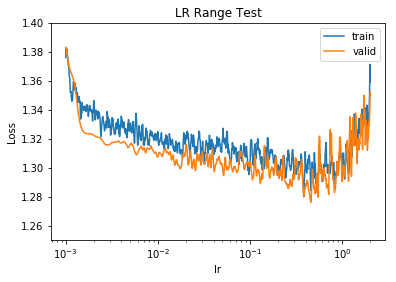

In [2]:
logs0 = np.load('20190813/range_test_b1024_d0.001.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
epochs = logs0['lr']
t_loss0[2:-2] = np.convolve(t_loss0, np.ones(5)/5, 'valid')
v_loss0[2:-2] = np.convolve(v_loss0, np.ones(5)/5, 'valid')
plt.semilogx(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train','valid'])
plt.title('LR Range Test')
plt.xlabel('lr')
plt.ylabel('Loss')
plt.ylim([1.25, 1.4])
plt.show()

{'t_tuple': (20, 500), 'v_tuple': (0, 20), 'steps': 500, 'lr_tuple': (0.005, 2.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 4096, 'decay': 0.0001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


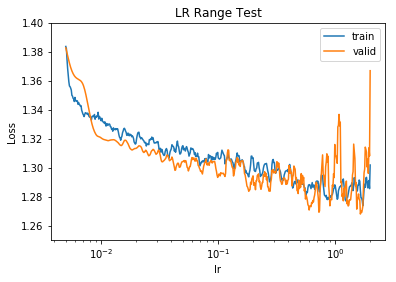

In [3]:
logs0 = np.load('20190813/range_test_20_500_b4096_d0.0001.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
epochs = logs0['lr']
t_loss0[2:-2] = np.convolve(t_loss0, np.ones(5)/5, 'valid')
v_loss0[2:-2] = np.convolve(v_loss0, np.ones(5)/5, 'valid')
plt.semilogx(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train','valid'])
plt.title('LR Range Test')
plt.xlabel('lr')
plt.ylabel('Loss')
plt.ylim([1.25, 1.4])
plt.show()

{'t_tuple': (20, 500), 'v_tuple': (0, 20), 'steps': 1000, 'lr_tuple': (0.001, 2.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.0003, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}
{'t_tuple': (20, 500), 'v_tuple': (0, 20), 'steps': 1000, 'lr_tuple': (0.001, 2.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.0001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


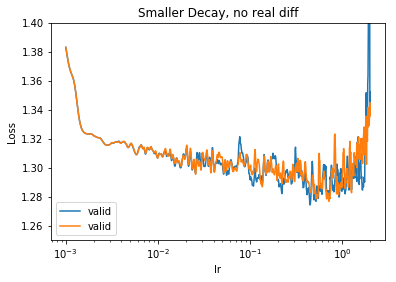

In [17]:
logs0 = np.load('20190813/range_test_20_500_b1024_d0.0003.npz')
logs1 = np.load('20190813/range_test_20_500_b1024_d0.0001.npz')
print(logs0['params'])
print(logs1['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
t_loss1 = logs1['t_loss']
v_loss1 = logs1['v_loss']
epochs = logs0['lr']
t_loss0[2:-2] = np.convolve(t_loss0, np.ones(5)/5, 'valid')
v_loss0[2:-2] = np.convolve(v_loss0, np.ones(5)/5, 'valid')
t_loss1[2:-2] = np.convolve(t_loss1, np.ones(5)/5, 'valid')
v_loss1[2:-2] = np.convolve(v_loss1, np.ones(5)/5, 'valid')
plt.semilogx(epochs, v_loss0, epochs, v_loss1)
plt.legend(['valid', 'valid'])
plt.title('Smaller Decay, no real diff')
plt.xlabel('lr')
plt.ylabel('Loss')
plt.ylim([1.25, 1.4])
plt.show()

{'t_tuple': (20, 500), 'v_tuple': (0, 20), 'epochs': 40, 'lr_tuple': (0.01, 0.5), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


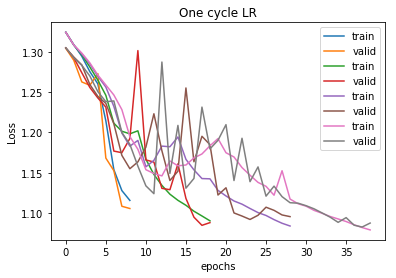

Longer epochs not really giving much benefit. Time cost is much more important.


In [24]:
exps = ['20190813/20_500_epox10_clr0.01.npz',
        '20190813/20_500_epox20_clr0.01.npz',
        '20190813/20_500_epox30_clr0.01.npz',
        '20190813/20_500_epox40_clr0.01.npz',
       ]
curves = []
for exp in exps:
    logs = np.load(exp)
    t_loss = logs['t_loss']
    v_loss = logs['v_loss']
    epochs = np.arange(len(t_loss))
    curves.extend([epochs, t_loss, epochs, v_loss])
print(logs['params'])
plt.plot(*curves)
plt.legend(['train','valid'] * len(exps))
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('Longer epochs not really giving much benefit. Time cost is much more important.')

{'t_tuple': (20, 500), 'v_tuple': (0, 20), 'epochs': 30, 'lr_tuple': (0.01, 0.5), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}
{'t_tuple': (20, 500), 'v_tuple': (0, 20), 'epochs': 30, 'lr_tuple': (0.005, 0.2), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


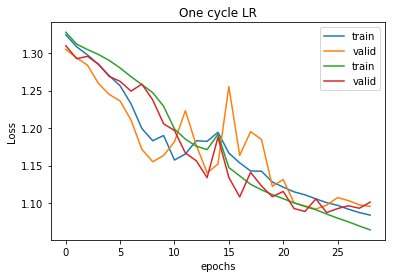

Lower lr may be better. Overfitting in the last 5 epochs


In [28]:
exps = ['20190813/20_500_epox30_clr0.01.npz',
        '20190813/20_500_epox30_clr0.005.npz',
       ]
curves = []
for exp in exps:
    logs = np.load(exp)
    t_loss = logs['t_loss']
    v_loss = logs['v_loss']
    epochs = np.arange(len(t_loss))
    curves.extend([epochs, t_loss, epochs, v_loss])
    print(logs['params'])
plt.plot(*curves)
plt.legend(['train','valid'] * len(exps))
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('Lower lr may be better. Overfitting in the last 5 epochs')

{'t_tuple': (20, 500), 'v_tuple': (0, 20), 'epochs': 20, 'lr_tuple': (0.005, 0.2), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 1e-06, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


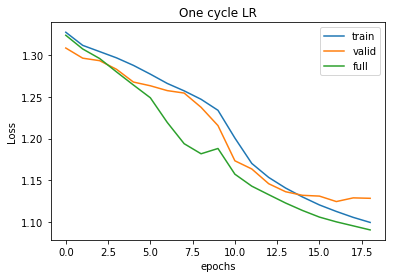

In [36]:
logs0 = np.load('20190813/20_500_epox20_clr0.005.npz')
logs1 = np.load('20190813/0_500_epox20_clr0.01.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
t_loss1 = logs1['t_loss']
lr0 = logs0['lr']
epochs = np.arange(len(t_loss0))
epochs1 = np.arange(len(t_loss1))
plt.plot(epochs, t_loss0, epochs, v_loss0, epochs1, t_loss1)
plt.legend(['train','valid', 'full'])
plt.title('One cycle LR')
plt.xlabeln('epochs')
plt.ylabel('Loss')
plt.show()

{'t_tuple': (0, 500), 'v_tuple': None, 'epochs': 30, 'lr_tuple': (0.01, 0.2), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


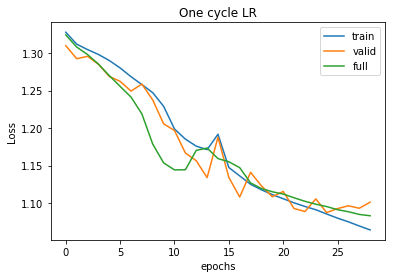

In [3]:
logs0 = np.load('20190813/20_500_epox30_clr0.005.npz')
logs1 = np.load('20190813/0_500_epox30_clr0.01.npz')
print(logs1['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
t_loss1 = logs1['t_loss']
lr0 = logs0['lr']
epochs = np.arange(len(t_loss0))
epochs1 = np.arange(len(t_loss1))
plt.plot(epochs, t_loss0, epochs, v_loss0, epochs1, t_loss1)
plt.legend(['train','valid', 'full'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

{'t_tuple': (0, 500), 'v_tuple': None, 'epochs': 20, 'lr_tuple': (0.018, 0.5), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.00043, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


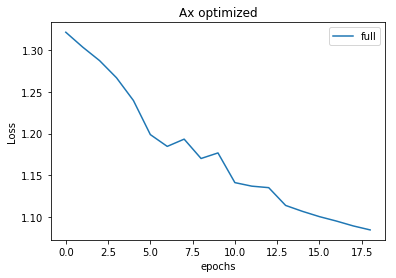

In [7]:
logs1 = np.load('20190813/0_500_epox20_clr0.018.npz')
print(logs1['params'])
t_loss1 = logs1['t_loss']
epochs1 = np.arange(len(t_loss1))
plt.plot(epochs1, t_loss1)
plt.legend(['full'])
plt.title('Ax optimized')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

## 600 games

{'t_tuple': (200, 600), 'v_tuple': (0, 100), 'epochs': 30, 'lr_tuple': (0.01, 0.2), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


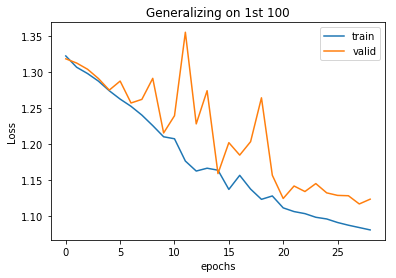

Still able to generalize, although there is a slight gap.
Worth testing performance comparisons for 0-600 vs 200-600


In [7]:
# First test generalizibility of first 100 games 
# The % down moves has increased significantly compared to initial fixed games
logs0 = np.load('20190814/200_600_epox30_clr0.01.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
lr0 = logs0['lr']
epochs = np.arange(len(t_loss0))
plt.plot(epochs, t_loss0, epochs, v_loss0)
plt.legend(['train','valid'])
plt.title('Generalizing on 1st 100')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('Still able to generalize, although there is a slight gap.')
print('Worth testing performance comparisons for 0-600 vs 200-600')

{'t_tuple': (50, 600), 'v_tuple': (0, 50), 'steps': 500, 'lr_tuple': (0.05, 2.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}
{'t_tuple': (50, 600), 'v_tuple': (0, 50), 'steps': 500, 'lr_tuple': (0.05, 2.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.0001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


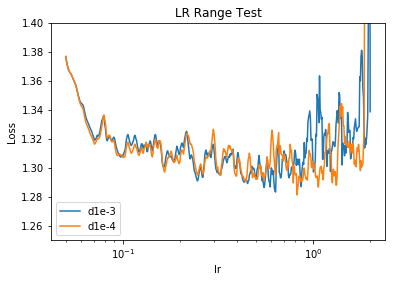

In [17]:
logs0 = np.load('20190814/range_test_50_600_b1024_d0.001.npz')
logs1 = np.load('20190814/range_test_50_600_b1024_d0.0001.npz')
print(logs0['params'])
print(logs1['params'])
v_loss0 = logs0['v_loss']
v_loss1 = logs1['v_loss']
lr0 = logs0['lr']
lr1 = logs1['lr']
v_loss0[2:-2] = np.convolve(v_loss0, np.ones(5)/5, 'valid')
v_loss1[2:-2] = np.convolve(v_loss1, np.ones(5)/5, 'valid')
plt.semilogx(lr0, v_loss0, lr1, v_loss1)
plt.legend(['d1e-3','d1e-4'])
plt.title('LR Range Test')
plt.xlabel('lr')
plt.ylabel('Loss')
plt.ylim([1.25, 1.4])
plt.show()

{'t_tuple': (50, 600), 'v_tuple': (0, 50), 'steps': 400, 'lr_tuple': (0.05, 2.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 4096, 'decay': 0.001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}
{'t_tuple': (50, 600), 'v_tuple': (0, 50), 'steps': 400, 'lr_tuple': (0.05, 2.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 4096, 'decay': 0.0001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


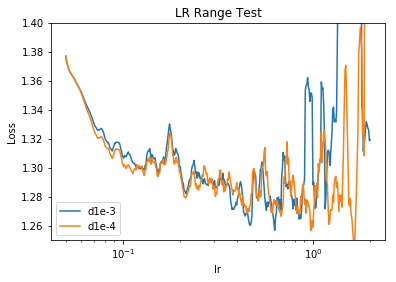

In [18]:
logs0 = np.load('20190814/range_test_50_600_b4096_d0.001.npz')
logs1 = np.load('20190814/range_test_50_600_b4096_d0.0001.npz')
print(logs0['params'])
print(logs1['params'])
v_loss0 = logs0['v_loss']
v_loss1 = logs1['v_loss']
lr0 = logs0['lr']
lr1 = logs1['lr']
v_loss0[2:-2] = np.convolve(v_loss0, np.ones(5)/5, 'valid')
v_loss1[2:-2] = np.convolve(v_loss1, np.ones(5)/5, 'valid')
plt.semilogx(lr0, v_loss0, lr1, v_loss1)
plt.legend(['d1e-3','d1e-4'])
plt.title('LR Range Test')
plt.xlabel('lr')
plt.ylabel('Loss')
plt.ylim([1.25, 1.4])
plt.show()

Greater batch sizes give lower losses (but mostly due to more training in less time).  
Lower decay (1e-4) allows network to use higher learning rates.

{'t_tuple': (50, 600), 'v_tuple': (0, 50), 'steps': 400, 'lr_tuple': (0.05, 2.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 4096, 'decay': 0.0001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}
{'t_tuple': (50, 600), 'v_tuple': (0, 50), 'steps': 300, 'lr_tuple': (0.05, 2.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 16384, 'decay': 0.0001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


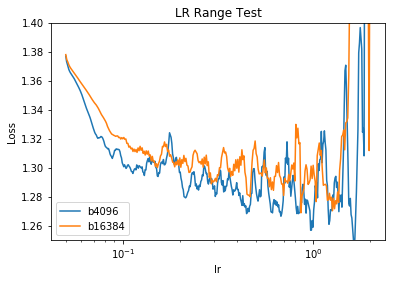

Batch size of 4096 works well


In [20]:
logs0 = np.load('20190814/range_test_50_600_b4096_d0.0001.npz')
logs1 = np.load('20190814/range_test_50_600_b16384_d0.0001.npz')
print(logs0['params'])
print(logs1['params'])
v_loss0 = logs0['v_loss']
v_loss1 = logs1['v_loss']
lr0 = logs0['lr']
lr1 = logs1['lr']
v_loss0[2:-2] = np.convolve(v_loss0, np.ones(5)/5, 'valid')
v_loss1[2:-2] = np.convolve(v_loss1, np.ones(5)/5, 'valid')
plt.semilogx(lr0, v_loss0, lr1, v_loss1)
plt.legend(['b4096', 'b16384'])
plt.title('LR Range Test')
plt.xlabel('lr')
plt.ylabel('Loss')
plt.ylim([1.25, 1.4])
plt.show()

Batch size of 4096 works well. The maximum lr appears to be greater than 1.0. However, in the last round of training, I found that using a max lr of much less than 1.0 was better. I will test that again.

{'t_tuple': (50, 600), 'v_tuple': (0, 50), 'epochs': 30, 'lr_tuple': (0.1, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 4096, 'decay': 0.0001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}
{'t_tuple': (50, 600), 'v_tuple': (0, 50), 'epochs': 30, 'lr_tuple': (0.01, 0.2), 'mom_tuple': (0.95, 0.85), 'batch_size': 4096, 'decay': 0.0001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


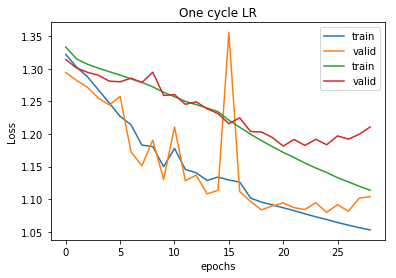

Higher lr appears to be better. Perhaps due to larger bs.


In [22]:
exps = ['20190814/50_600_epox30_clr0.1.npz',
        '20190814/50_600_epox30_clr0.01.npz',
       ]
curves = []
for exp in exps:
    logs = np.load(exp)
    t_loss = logs['t_loss']
    v_loss = logs['v_loss']
    epochs = np.arange(len(t_loss))
    curves.extend([epochs, t_loss, epochs, v_loss])
    print(logs['params'])
plt.plot(*curves)
plt.legend(['train','valid'] * len(exps))
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('Higher lr appears to be better. Perhaps due to larger bs.')

{'t_tuple': (50, 600), 'v_tuple': (0, 50), 'epochs': 20, 'lr_tuple': (0.1, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 4096, 'decay': 0.0001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}
{'t_tuple': (50, 600), 'v_tuple': (0, 50), 'epochs': 30, 'lr_tuple': (0.1, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 4096, 'decay': 0.0001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}
{'t_tuple': (50, 600), 'v_tuple': (0, 50), 'epochs': 40, 'lr_tuple': (0.1, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 4096, 'decay': 0.0001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


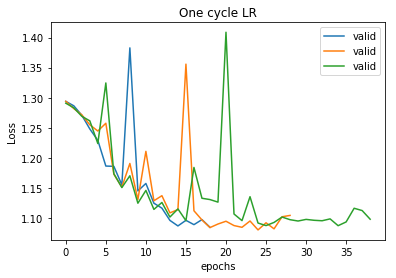

20 epochs is just fine


In [31]:
exps = [
        '20190814/50_600_epox20_clr0.1.npz',
        '20190814/50_600_epox30_clr0.1.npz',
        '20190814/50_600_epox40_clr0.1.npz',
       ]
curves = []
for exp in exps:
    logs = np.load(exp)
    t_loss = logs['t_loss']
    v_loss = logs['v_loss']
    epochs = np.arange(len(t_loss))
    curves.extend([epochs, v_loss])
    print(logs['params'])
plt.plot(*curves)
plt.legend(['valid'] * len(exps))
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()
print('20 epochs is just fine')

{'t_tuple': (50, 600), 'v_tuple': (0, 50), 'epochs': 20, 'lr_tuple': (0.1, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 4096, 'decay': 0.0001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}
{'t_tuple': (50, 600), 'v_tuple': (0, 50), 'epochs': 20, 'lr_tuple': (0.1, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 4096, 'decay': 0.0001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


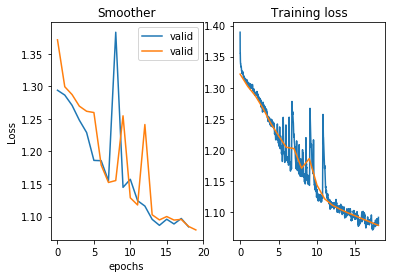

Training and validation approach the same value. No real difference.


In [49]:
# Smoother lr curves
# Update lr per step rather than per epoch
exps = [
        '20190814/50_600_epox20_clr0.1.npz',
        '20190814/50_600_epox20_clr0.1_smooth.npz',
       ]
curves = []
logs = []
t_loss = []
v_loss = []
lr = []
for i, exp in enumerate(exps):
    log = np.load(exp)
    t_loss.append(log['t_loss'])
    v_loss.append(log['v_loss'])
    lr.append(log['lr'])
    epochs = np.arange(len(v_loss[i]))
    curves.extend([epochs, v_loss[i]])
    print(log['params'])
plt.subplot(121)
plt.plot(*curves)
plt.legend(['valid']*len(exps))
plt.title('Smoother')
plt.xlabel('epochs')
plt.ylabel('Loss')

plt.subplot(122)
t_loss[1][2:-2] = np.convolve(t_loss[1], np.ones(5)/5, 'valid')
epochs0 = np.arange(len(t_loss[0]))
epochs1 = np.linspace(0, 18, len(t_loss[1]))
plt.plot(epochs1, t_loss[1], epochs0, t_loss[0])
plt.title('Training loss')
plt.show()
print('Training and validation approach the same value. No real difference.')

{'t_tuple': (0, 600), 'v_tuple': None, 'epochs': 20, 'lr_tuple': (0.1, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 4096, 'decay': 0.0001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}
{'t_tuple': (200, 600), 'v_tuple': (0, 200), 'epochs': 20, 'lr_tuple': (0.1, 1.0), 'mom_tuple': (0.95, 0.85), 'batch_size': 4096, 'decay': 0.0001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


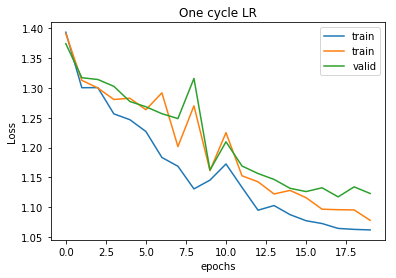

In [55]:
# Final training
exps = [
        '20190814/0_600_epox20_clr0.1.npz',
        '20190814/200_600_epox20_clr0.1.npz',
       ]
curves = []
for exp in exps:
    logs = np.load(exp)
    t_loss = logs['t_loss']
    v_loss = logs['v_loss']
    epochs = np.arange(len(t_loss))
    curves.extend([epochs, t_loss])
    print(logs['params'])
curves.extend([epochs, v_loss])
plt.plot(*curves)
plt.legend(['train', 'train', 'valid'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

#### Reverting to batch size 1024
I had to revert in order to get the stronger playing strength

{'t_tuple': (0, 600), 'v_tuple': None, 'epochs': 38, 'lr_tuple': (0.00185, 0.2), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.0037, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}
{'t_tuple': (20, 600), 'v_tuple': (0, 20), 'epochs': 38, 'lr_tuple': (0.00185, 0.2), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.0037, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


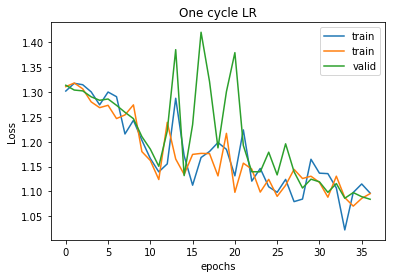

In [3]:
# Final training
exps = [
        '20190815/0_600_epox38_clr0.00185.npz',
        '20190815/20_600_epox38_clr0.00185.npz',
       ]
curves = []
for exp in exps:
    logs = np.load(exp)
    t_loss = logs['t_loss']
    v_loss = logs['v_loss']
    epochs = np.arange(len(t_loss))
    curves.extend([epochs, t_loss])
    print(logs['params'])
curves.extend([epochs, v_loss])
plt.plot(*curves)
plt.legend(['train', 'train', 'valid'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

{'t_tuple': (0, 600), 'v_tuple': None, 'epochs': 38, 'lr_tuple': (0.00185, 0.2), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.0037, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}
{'t_tuple': (0, 600), 'v_tuple': None, 'epochs': 50, 'lr_tuple': (0.00185, 0.2), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.0037, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


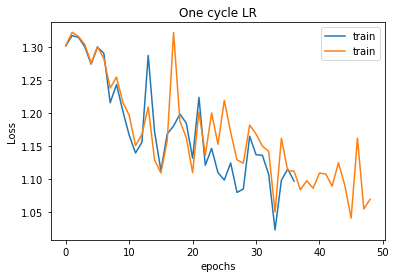

In [4]:
# Final training
exps = [
        '20190815/0_600_epox38_clr0.00185.npz',
        '20190815/0_600_epox50_clr0.00185.npz',
       ]
curves = []
for exp in exps:
    logs = np.load(exp)
    t_loss = logs['t_loss']
    epochs = np.arange(len(t_loss))
    curves.extend([epochs, t_loss])
    print(logs['params'])
plt.plot(*curves)
plt.legend(['train', 'train'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

These new One cycle plots only show training loss for one step, not the entire epoch. I need to smooth out the curves in order to get better graphs. However, it appears that addition epochs >38 does not reduce loss that much.

## 800 games

{'t_tuple': (0, 800), 'v_tuple': None, 'epochs': 45, 'lr_tuple': (0.01, 0.2), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}
{'t_tuple': (200, 800), 'v_tuple': (0, 100), 'epochs': 50, 'lr_tuple': (0.01, 0.1), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


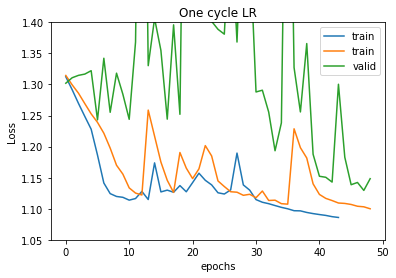

For some reason, training on 200-800 failed with these hyperparameters


In [16]:
exps = [
        '20190820/0_800_epox45_clr0.01.npz',
        '20190820/200_800_epox50_clr0.01.npz',
       ]
curves = []
for exp in exps:
    logs = np.load(exp)
    t_loss = logs['t_loss']
    v_loss = logs['v_loss']
    epochs = np.arange(len(t_loss))
    curves.extend([epochs, t_loss])
    print(logs['params'])
curves.extend([epochs, v_loss])
plt.plot(*curves)
plt.legend(['train', 'train', 'valid'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.ylim([1.05, 1.4])
plt.show()
print('For some reason, training on 200-800 failed with these hyperparameters')

{'t_tuple': (200, 800), 'v_tuple': (0, 100), 'epochs': 50, 'lr_tuple': (0.01, 0.1), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


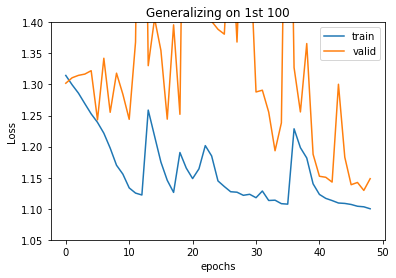

In [13]:
logs0 = np.load('20190820/200_800_epox50_clr0.01.npz')
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
lr0 = logs0['lr']
epochs = np.arange(len(t_loss0))
plt.plot(epochs, t_loss0, epochs, v_loss0)
plt.ylim([1.05, 1.4])
plt.legend(['train','valid'])
plt.title('Generalizing on 1st 100')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

{'t_tuple': (0, 800), 'v_tuple': None, 'epochs': 40, 'lr_tuple': (0.01, 0.2), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}
{'t_tuple': (100, 800), 'v_tuple': (0, 100), 'epochs': 45, 'lr_tuple': (0.01, 0.2), 'mom_tuple': (0.95, 0.85), 'batch_size': 1024, 'decay': 0.001, 'pretrained': None, 'path': 'selfplay/min_move_dead/min', 'net_params': {'channels': 32, 'num_blocks': 5}}


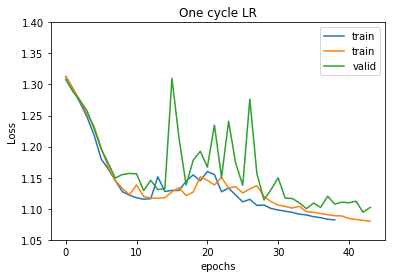

In [18]:
exps = [
        '20190820/0_800_epox40_clr0.01.npz',
        '20190820/100_800_epox45_clr0.01.npz',
       ]
curves = []
for exp in exps:
    logs = np.load(exp)
    t_loss = logs['t_loss']
    v_loss = logs['v_loss']
    epochs = np.arange(len(t_loss))
    curves.extend([epochs, t_loss])
    print(logs['params'])
curves.extend([epochs, v_loss])
plt.plot(*curves)
plt.legend(['train', 'train', 'valid'])
plt.title('One cycle LR')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.ylim([1.05, 1.4])
plt.show()